# Question 2
##### *Teagan*

### What is the correlation between windspeed and flight delays?

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [53]:
df = pd.read_csv("../data/clean_2018_3_Days.csv")
df.describe()

,Flight_Number,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay,Origin Cloud Cover,Origin Dew,Origin Humidity,...,Destination Cloud Cover,Destination Dew,Destination Humidity,Destination Precipitation,Destination Pressure,Destination Snow,Destination Temperature,Destination Visibility,Destination Windspeed,Destination Precipitation Probability
count,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,...,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.0,62505.000000,62505.000000,62505.000000,62505.000000
mean,2423.316535,1472.297992,1438.866171,19.397872,1331.601152,1348.178626,22.199424,47.709546,64.160440,66.507481,...,48.001853,64.190990,67.190203,0.005389,1014.575516,0.0,77.846966,9.479854,7.105628,9.932005
std,1785.767589,533.553666,575.821009,58.936906,501.690044,527.694912,57.049410,36.357415,8.258792,20.511353,...,36.715042,8.271181,20.922191,0.035086,4.138986,0.0,9.082118,1.244325,4.013620,29.909365
min,1.000000,1.000000,1.000000,-64.000000,1.000000,1.000000,-40.000000,0.000000,24.200000,14.480000,...,0.000000,24.200000,14.480000,0.000000,1003.000000,0.0,44.000000,0.000000,0.000000,0.000000
25%,948.000000,1045.000000,1026.000000,-10.000000,907.000000,912.000000,-4.000000,13.400000,59.200000,54.410000,...,13.400000,59.200000,54.690000,0.000000,1012.100000,0.0,72.000000,9.900000,4.500000,0.000000
50%,2013.000000,1505.000000,1451.000000,0.000000,1320.000000,1335.000000,0.000000,44.500000,64.800000,70.800000,...,44.500000,64.800000,72.340000,0.000000,1014.400000,0.0,77.300000,9.900000,6.700000,0.000000
75%,3641.000000,1919.000000,1922.000000,26.000000,1744.000000,1806.000000,25.000000,86.200000,70.800000,82.350000,...,86.900000,71.000000,84.060000,0.000000,1017.300000,0.0,83.400000,9.900000,9.900000,0.000000
max,7439.000000,2359.000000,2400.000000,1861.000000,2359.000000,2400.000000,1861.000000,100.000000,81.100000,100.000000,...,100.000000,81.100000,100.000000,1.151000,1027.800000,0.0,107.800000,28.100000,24.200000,100.000000


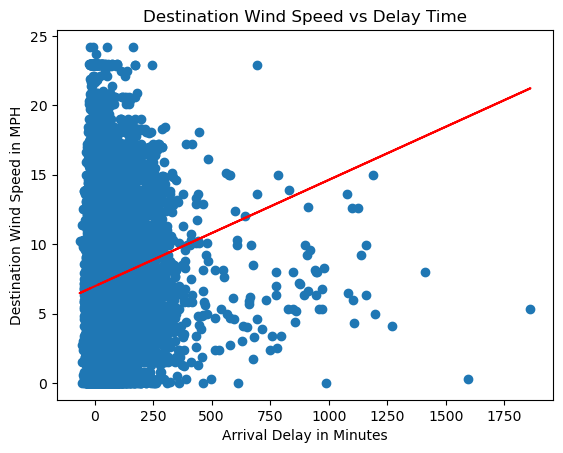

In [3]:
x = df["Arrival_Delay"]
y = df["Destination Windspeed"]
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, c = 'red')
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Destination Wind Speed in MPH")
plt.title("Destination Wind Speed vs Delay Time")
plt.savefig("Figure_1")

plt.show()

In [4]:
new_df = pd.DataFrame()
new_df["Arrival_Delay"] = df["Arrival_Delay"]
new_df["Destination Windspeed"] = df["Destination Windspeed"]

In [5]:
print(new_df.corr())

                       Arrival_Delay  Destination Windspeed
Arrival_Delay               1.000000               0.112571
Destination Windspeed       0.112571               1.000000


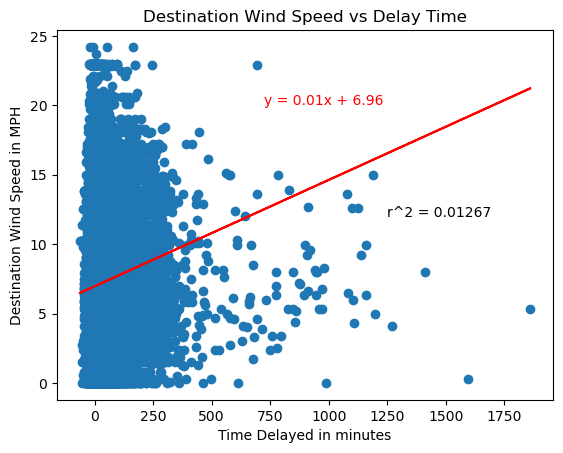

In [19]:
# Print out the r-squared value along with the plot.
x_values = df["Arrival_Delay"]
y_values = df["Destination Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(725,20),fontsize=10,color="red")
plt.xlabel('Time Delayed in minutes')
plt.ylabel('Destination Wind Speed in MPH')
plt.title('Destination Wind Speed vs Delay Time')
r_sqrd = "r^2 = " + str(round(rvalue**2, 5))
plt.annotate(r_sqrd,(1250, 12), fontsize=10, color="black")
plt.savefig("Figure_1_Rsqrd")
plt.show()

In [7]:
len(df['Destination_Airport'].unique())
airports = df['Destination_Airport'].unique()
den = df.loc[df['Destination_Airport'] == 'DEN', 'Destination Windspeed']
den.mean()

8.043996203132414

In [60]:
grouped_df = df.groupby(['Destination_Airport'])
avg_windspeed = grouped_df['Destination Windspeed'].mean()
avg_arr_delay = grouped_df['Arrival_Delay'].mean()
avg_dep_delay = grouped_df['Departure_Delay'].mean()
airport_summary = pd.DataFrame({'Average Windspeed': avg_windspeed, 
                               'Arrival Delay': avg_arr_delay,
                               'Departure Delay': avg_dep_delay})
airport_summary['Average Windspeed'].max()

18.375688073394496

In [61]:
airport_wind = airport_summary.sort_values('Average Windspeed', ascending = False)
airport_wind = airport_wind.iloc[0:25]
print(airport_wind.corr())

                   Average Windspeed  Arrival Delay  Departure Delay
Average Windspeed           1.000000      -0.175589        -0.197977
Arrival Delay              -0.175589       1.000000         0.988391
Departure Delay            -0.197977       0.988391         1.000000


In [62]:
high_wind = df.sort_values('Destination Windspeed', ascending = False)
high_wind = high_wind.iloc[0:30000]
high_wind.head()

,Flight_Date,Origin_Airport,Destination_Airport,Flight_Number,Operating_Carrier,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay,Scheduled_Departure_Time,Actual_Departure_Time,...,Destination Cloud Cover,Destination Dew,Destination Humidity,Destination Precipitation,Destination Pressure,Destination Snow,Destination Temperature,Destination Visibility,Destination Windspeed,Destination Precipitation Probability
26176,2018-07-23,ATL,RSW,1136,DL,1537,1517.0,-20.0,1352,1348.0,...,54.3,75.6,64.80,0.002,1011.3,0.0,89.0,9.5,24.2,100.0
22503,2018-07-23,PHL,RSW,1670,AA,1633,1726.0,53.0,1350,1403.0,...,54.3,75.6,64.80,0.002,1011.3,0.0,89.0,9.5,24.2,100.0
40349,2018-07-23,LGA,RSW,3338,9E,1628,1912.0,164.0,1312,1530.0,...,54.3,75.6,64.80,0.002,1011.3,0.0,89.0,9.5,24.2,100.0
40178,2018-07-23,STL,RSW,1305,WN,1720,1714.0,-6.0,1345,1354.0,...,54.3,75.6,64.80,0.002,1011.3,0.0,89.0,9.5,24.2,100.0
42617,2018-07-24,JFK,BTV,5177,9E,1253,1301.0,8.0,1130,1129.0,...,88.3,65.1,50.37,0.000,1020.9,0.0,85.7,9.9,23.7,0.0


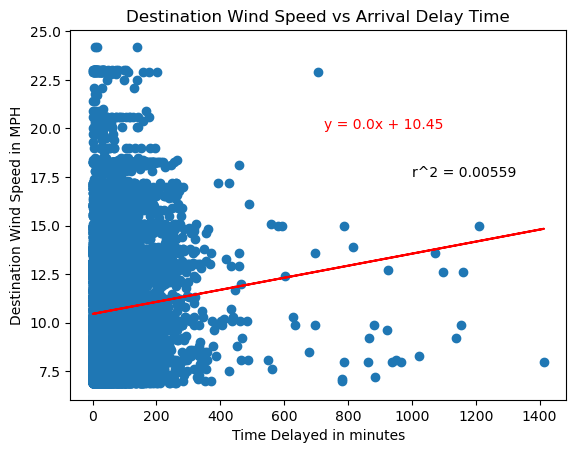

In [63]:
x_values = high_wind.loc[high_wind["Departure_Delay"] > 0, 'Departure_Delay']
y_values = high_wind.loc[high_wind['Departure_Delay'] > 0, 'Destination Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(725,20),fontsize=10,color="red")
plt.xlabel('Time Delayed in minutes')
plt.ylabel('Destination Wind Speed in MPH')
plt.title('Destination Wind Speed vs Arrival Delay Time')
r_sqrd = "r^2 = " + str(round(rvalue**2, 5))
plt.annotate(r_sqrd,(1000, 17.5), fontsize=10, color="black")
plt.savefig("Figure_1_Rsqrd")
plt.show()

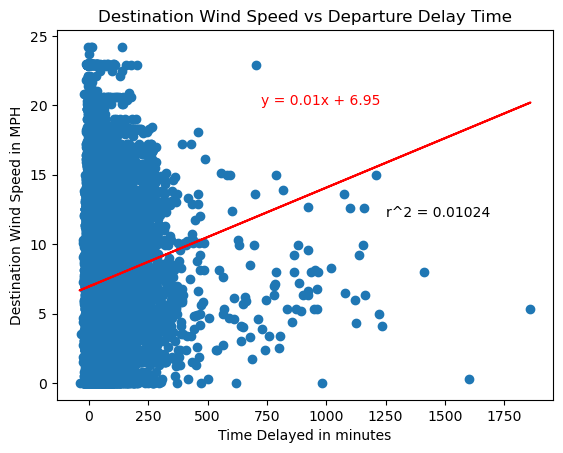

In [64]:
x_values = df["Departure_Delay"]
y_values = df["Destination Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(725,20),fontsize=10,color="red")
plt.xlabel('Time Delayed in minutes')
plt.ylabel('Destination Wind Speed in MPH')
plt.title('Destination Wind Speed vs Departure Delay Time')
r_sqrd = "r^2 = " + str(round(rvalue**2, 5))
plt.annotate(r_sqrd,(1250, 12), fontsize=10, color="black")
plt.savefig("Departure Delay")
plt.show()

In [67]:
airport_summary.sort_values('Average Windspeed', ascending = False)

,Average Windspeed,Arrival Delay,Departure Delay
Destination_Airport,,,
ABQ,18.375688,12.050459,14.600917
GCC,15.725000,20.375000,16.125000
LAR,15.266667,6.333333,6.166667
OTH,14.900000,-3.000000,-1.000000
SAF,14.833333,56.333333,60.666667
...,...,...,...
WRG,1.133333,-0.500000,0.500000
SIT,0.794118,-5.647059,-4.176471
FAI,0.566667,-5.833333,1.687500


In [68]:
airport_summary.sort_values('Arrival Delay', ascending = False)

,Average Windspeed,Arrival Delay,Departure Delay
Destination_Airport,,,
BQN,9.193333,109.933333,109.733333
SWF,10.415385,104.461538,106.230769
ORH,10.675000,89.750000,91.875000
PGV,8.130769,80.692308,71.153846
CKB,4.437500,60.750000,58.000000
...,...,...,...
BET,3.528571,-13.571429,-5.428571
HOB,12.100000,-13.666667,-2.500000
INL,5.366667,-14.000000,-4.500000


In [69]:
airport_summary.sort_values('Departure Delay', ascending = False)

,Average Windspeed,Arrival Delay,Departure Delay
Destination_Airport,,,
BQN,9.193333,109.933333,109.733333
SWF,10.415385,104.461538,106.230769
ORH,10.675000,89.750000,91.875000
PGV,8.130769,80.692308,71.153846
SAF,14.833333,56.333333,60.666667
...,...,...,...
YAK,3.866667,-8.333333,-7.500000
PPG,2.400000,-2.500000,-8.000000
OTZ,8.500000,-11.833333,-8.666667
